<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG src="https://samyzaf.com/ML/pima/pima2.png" width=600 align="left"/>

In [1]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import rcParams
rcParams['axes.grid'] = True
rcParams['figure.figsize'] = 8,7
# fixed random seed for reproducibility
np.random.seed(0)
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [2]:
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('https://samyzaf.com/ML/pima/pima.csv', names=features)

In [3]:
# Lets view the first 10 rows of the data set
# See below what these names mean

data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Medical Features short names

1. preg = Number of times pregnant
2. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres = Diastolic blood pressure (mm Hg)
4. skin = Triceps skin fold thickness (mm)
5. test = 2-Hour serum insulin (mu U/ml)
6. mass = Body mass index (weight in kg/(height in m)^2)
7. pedi = Diabetes pedigree function
8. age  = Age (years)
9. class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

More information: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [4]:
# How many rows do we have?

data.index

RangeIndex(start=0, stop=768, step=1)

In [5]:
# Try2: How many rows do we have?

len(data.index)

768

In [6]:
# How many columns do we have?

len(data.columns)

9

In [7]:
# How many records do we have in our data set?

data.size    # 9 * 768

6912

In [8]:
# You can get everything in one line !

data.shape

(768, 9)

In [9]:
# View the last 10 records of our data set

data.tail(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<Axes: >

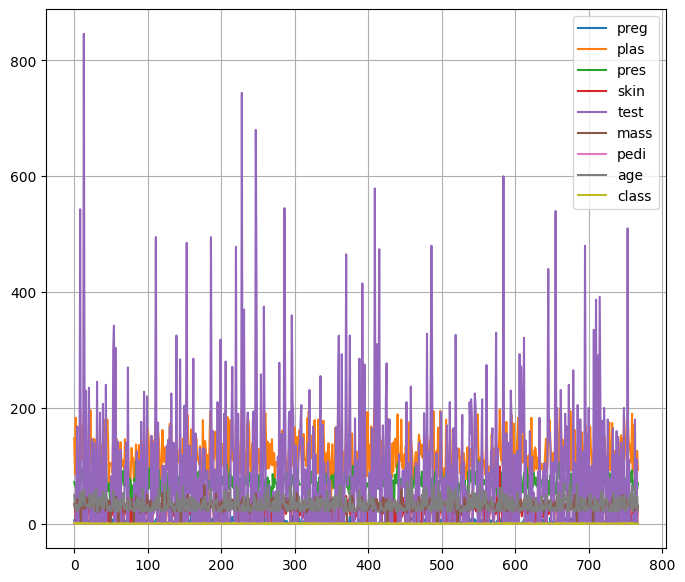

In [10]:
# The plot() method plots all features
# This is TMI (too much information)

data.plot()

<Axes: >

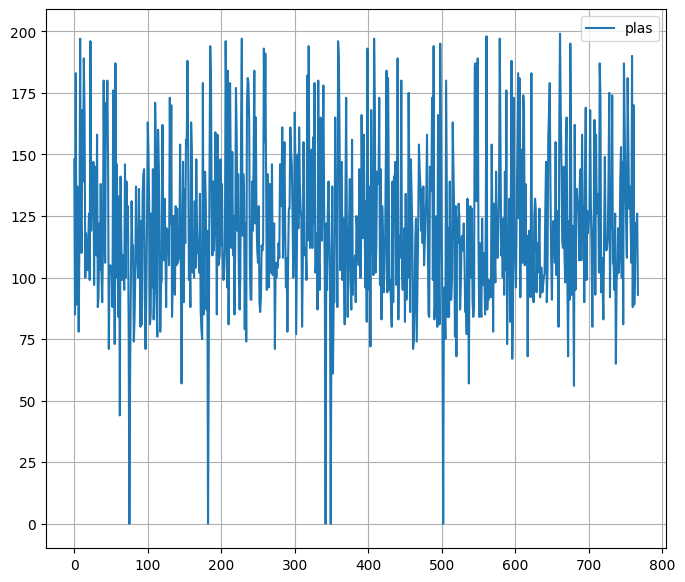

In [11]:
# Better try one at a time
# Here is the plasma concentration level per record distribution
# (less is more!)

data.plot(y='plas')

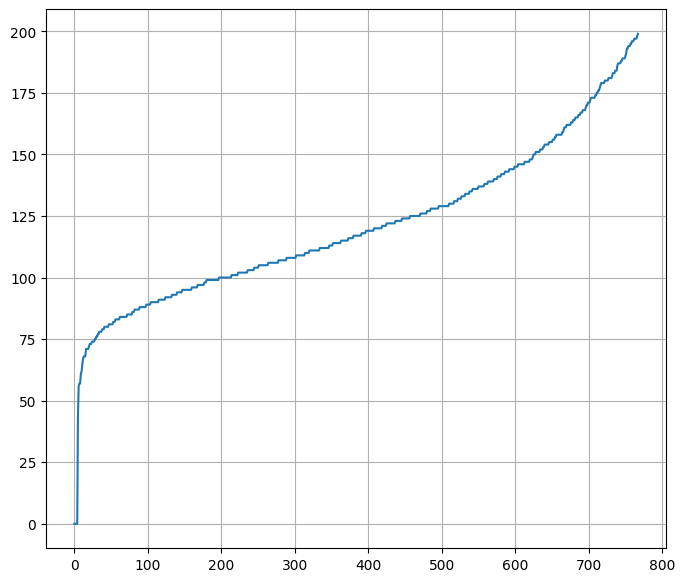

In [12]:
# The graph above does not look very useful.
# Let's sort the plas values
plt.plot(sorted(data.plas.to_numpy()))

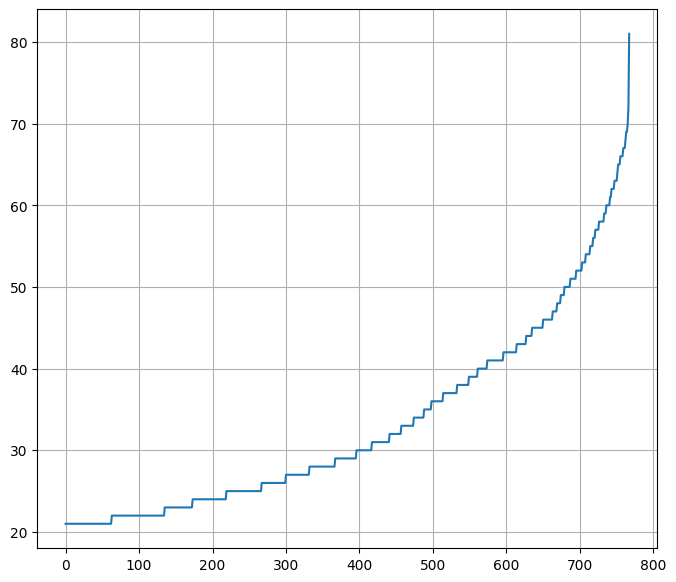

In [13]:
# This is the age distribution (sorted!)

plt.plot(sorted(data.age.to_numpy()))

In [14]:
# Age range

print("Min age = %d, Max age = %d" % (data.age.min(), data.age.max()))

Min age = 21, Max age = 81


In [15]:
# Age average

data.age.mean()

33.240885416666664

In [16]:
# Age median

data.age.median()

29.0

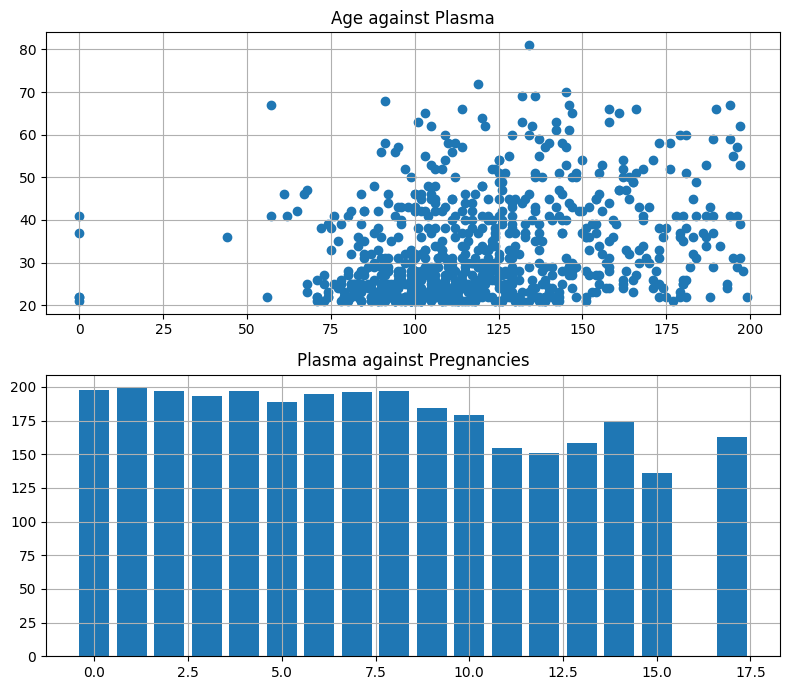

In [17]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=2, colspan=4)
top.scatter(data['plas'], data['age'])
plt.title('Age against Plasma')
bottom = plt.subplot2grid((4,4), (2,0), rowspan=2, colspan=4)
bottom.bar(data['preg'], data['plas'])
plt.title('Plasma against Pregnancies')
plt.tight_layout()

## Distribution by class=0 and class=1 (negative/positive diabetes test)

In [18]:
# Items with class == 0 (negative diabetes check)

data0 = data[data['class'] == 0]
len(data0.index)

500

In [19]:
# Items with class == 1 (persons with a positive diabtetes check)

data1 = data[data['class'] == 1]
len(data1.index)

268

,0
class,
0,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."
1,"[[Axes(0.125,0.666111;0.215278x0.213889), Axes..."


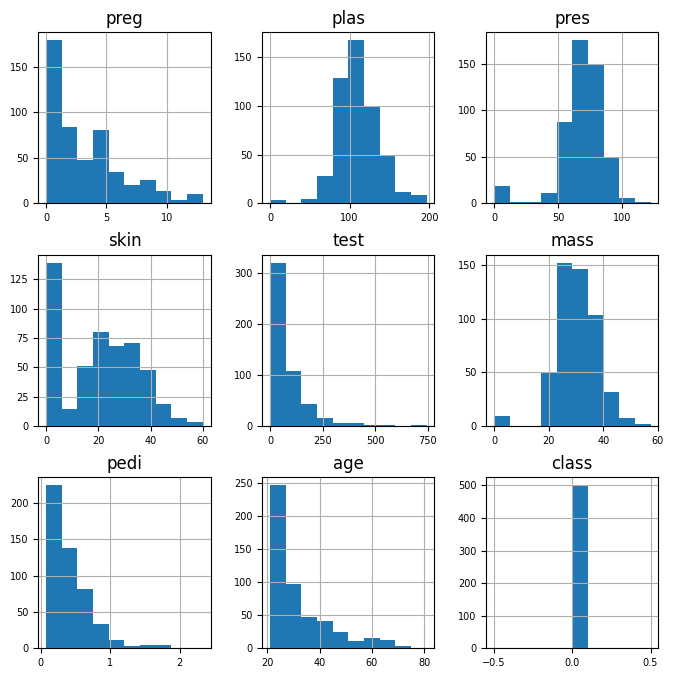

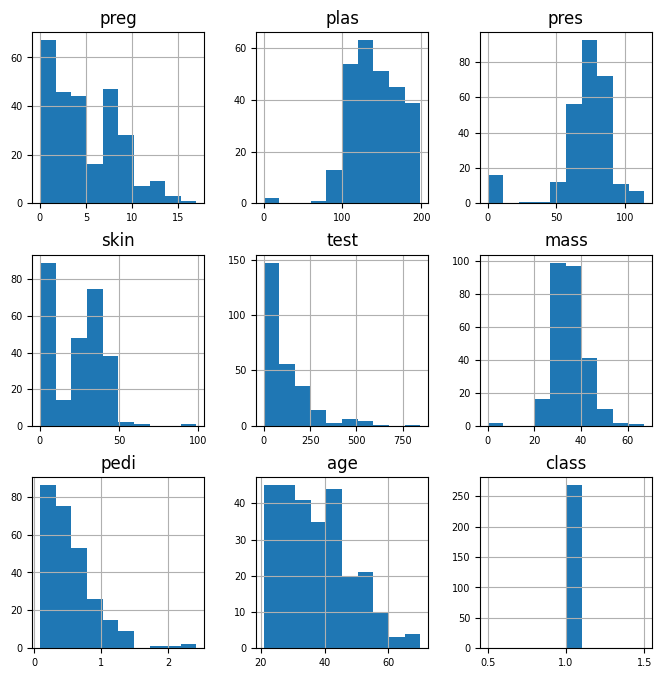

In [20]:
# The Pandas groupby method computes the distribution of one feature
# with respect to the others
# We see 8 histograms distrubuted against a negative diabetes chck
# and other 8 histograms with distribution against a positive diabetes check

data.groupby('class').hist(figsize=(8,8), xlabelsize=7, ylabelsize=7)

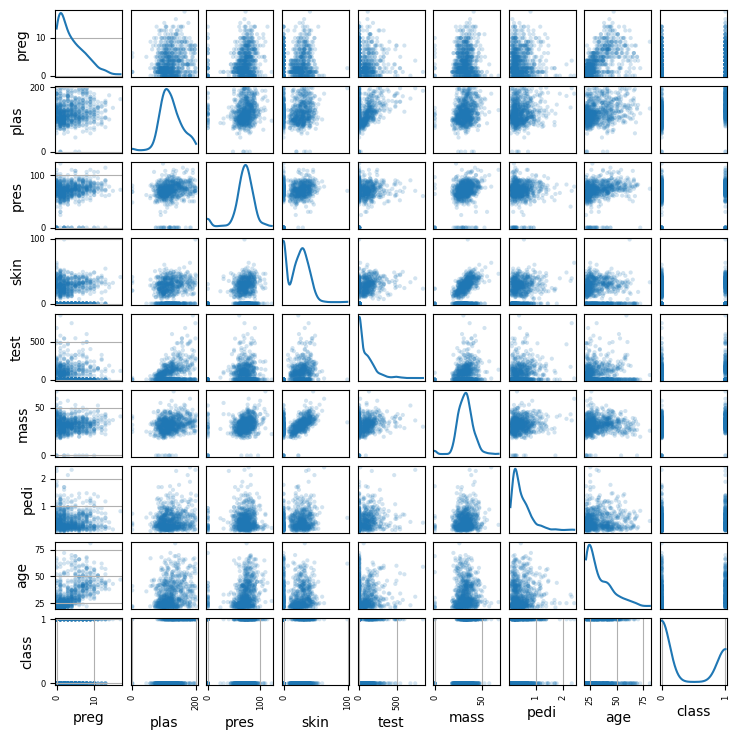

In [21]:
sm = scatter_matrix(data, alpha=0.2, figsize=(7.5, 7.5), diagonal='kde')

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 6) for item in sm.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 6) for item in sm.ravel()]
plt.tight_layout(h_pad=0.15, w_pad=0.15)

## Deep Learning with Keras

All the above Pandas coding and statistical charts are nice and helpful
but in most practical situations are useless for coming up with an algorithm
for predicting if a person is likely to have diabetes based on his 8 medical records.

In recent years, deep neural networks has been suggested as an effective technique for solving
such problem, and so far has shown to be successful in many areas.
We will try to build a simple neural network for predicting if a person has diabetes (0 or 1),
based of the 8 features in his record.
This is the full data except the class column!
We want to be able to predict the class (positive or negative diabetes check)
from the 8 features (as input)

In [22]:
#  Let's first extract the first 8 features from our data (from the 9 we have)
#  We want to be able to predict the class (positive or negative diabetes check)

X = data.iloc[:, 0:8]

In [23]:
# let's look at the first 10 records sample

X.head(10)

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [24]:
#This is the output class column!
Y = data.iloc[:,8]
Y.head(10)

,class
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


# Keras Model Defintion

<IMG src="https://samyzaf.com/ML/pima/nn6.png" align="center" width=600 />

1. A sequential neural-network in Keras consists of a sequence of layers,
starting from the inputs layer up to the output layer
(also known as **Feedforward Neural Network**).
The number and breadth of intermediate layers ("deep layers" or "hidden layers")
depends on accuracy and performance requirements that we impose.
We can start with a single hidden layer and add more neurons to it or add more
hidden layers in progressive stages until we meet our accuracy requirements.

2. The second factor we need to attend is the **connectivity type** of our network:
which neurons from a given layer are connected to which neurons at the next layer?
The most straightforward type is **full connectivity**, which means
that every neuron at a given layer is connected to every neuron at the next layer.
This type of connectivity is reffered to by the **Dense** method of Keras layers module.

3. The third factor is what kind of **activation function** are we going to use?
Each non-input neuron receives many inputs from neurons at the layer below it.
How do we determine its output?
The function that determines the value that a neuron fires in response to its inputs vector is called
the **activation function** of the model.
<BR/>
<IMG src="https://samyzaf.com/ML/pima/perceptron1.jpg" width=600 align="CENTER"/>

4. Each connection must be assigned an initial weight, which is going to be tuned
during the training phase.
The usual arrangement is to assign small random weights when the model is defined.
It usually has a negligible impact on the training speed.

The most common activation function used is **the rectified linear unit** (ReLU) function which is simply
$$
\textbf{relu}(\vec{x}) = \max(\vec{w} \cdot \vec{x} + b, 0)
$$
where $\vec{x}$ is the inputs vector, $\vec{w}$ is the weights vector,
and $b$ is the bias value.
In many experiments it has been determined that it is fast and leads to more accurate model.

For the output layer, the common practice is to use the **sigmoid activation function** as its output is always
between 0 and 1 (which is useful for classifying).
The sigmoid activation function is defined by:
$$
\sigma(\vec{x}) = \frac{1}{1 + e^{-(\Sigma\vec{w} \cdot \vec{x} + b)}}
\\
\hbox{  }
$$
where $\vec{x}$  is the inputs vector, $\vec{w}$ is the weights vector,
and $b$ is the bias value.

More information on activation functions is found here:
http://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons

In [25]:
# Our first Keras Model
model1 = Sequential()
model1.add(Dense(16, input_shape=(8,), kernel_initializer='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


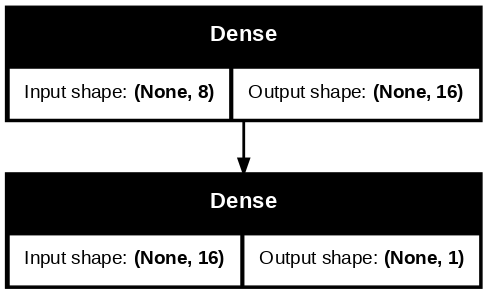

In [26]:
plot_model(model1, to_file='model1.png', show_shapes=True, dpi=100)

Another symbolic view  

<IMG src="https://samyzaf.com/ML/pima/model1.jpg" width=700 align="LEFT" />

## Compiling the model

After defining our model, we need to compile it to an efficient object code.
If you own an advanced graphics card (**GPU**) like NVIDIA Tesla
or Titan, then with
proper configuration you will be able to run these nn models
in a much faster
and efficient manner than on a traditional Intel/AMD CPU.

The Keras compile method accepts two important parameters:
**loss** and **optimizer**.
1. A **loss function** role is to measure the distance from an actual output to the **correct** output (the **error**).
It is the main source of feedback in the training process.
Each time we run our model on a given input, the loss function measures the error of the output from the target objective.
The main purpose of the training phase is to **minimize** the loss values.
The standard choice is **the logarithmic loss function** which in Keras is reffered to as **binary_crossentropy**.
The formula is:
$$
\textbf{cross_entropy} (\vec{t}, \vec{o}) = - ( \vec{t} \cdot \log(\vec{o}) + (1 - \vec{t}) \cdot \log(1 - \vec{o}))
$$
where $\vec{t}$ is the target vector and $\vec{o}$ is the model output vector.

2. The **optimizer** argument is a function which Keras is using
for optimizing the model edge weights during the
training process.
Each time Keras finds a gap between the model output and the
correct output, it tries to tune the weights
of the model connections so as to minimize this gap as much
as possible.
This is a very delicate and highly intricate process that
deserves a math course by itself.
For our purposes it's enough to be familiar with its simplest form which in traditional math is called **Stochastic Gradient Descent** . Keras is using a specific variation which it calls **adam**.
If needed, more information on this optimizer can be picked from here:
https://arxiv.org/abs/1412.6980

3. The last parameter for the compile function is the **metrics** argument.
It designates a method to judge the overall performance of our
model by looking at
large lists of outputs and targets.
This is enough for the moment, it will be covered in more
depth later on.
Keras referrence: https://keras.io/metrics

In [27]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Model

After defining and compiling our model, it's time for training!
<br/>
We will feed our model with many samples as inputs and their correct outputs.
Hopefully, after learning many real examples, our model will be capable of solving new cases.

1. The training phase consists of several cycles (called **epochs** in Keras jargon), in which our training set is fed to it
repeatedly. The number of **epochs** is up to you, and we may experiment with several options.
2. In the training phase, our model will tune the weights of its edges.
Keras provides an option to decide at which points the weights update is done through the **batch_size** argument.
The weights update will occur after every **batch_size** training instances.
Note that each epoch consists of the training of all test cases.
We will try 200 epochs and a batch_size of 16.
3. Our pima data set consists of 768 cases. We will use 668 of them for training and the
remaining 100 cases for validation (testing).

In [28]:
X_train = X[0:668].to_numpy()
Y_train = Y[0:668].to_numpy()
X_test = X[668:].to_numpy()
Y_test = Y[668:].to_numpy()

## FitMonitor
The **FitMonitor** callback is defined in the
[**kerutils**](http://www.samyzaf.com/cgi-bin/view_file.py?file=ML/lib/kerutils.py)
module and its purpose is to monitor
the progress of the training process, report progress and some intermediate statistics,
and save the best model in which the training accuracy and validations accuracy are
maximal and are close enough
(see 'filename' the 'thresh' parameters below).

In [29]:
fmon = FitMonitor()

And now the actual training is performed by the Keras Model **fit** method.

In [30]:
h = model1.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=10,
    verbose=0,
    validation_data=(X_test, Y_test),
    callbacks=[fmon],
)

Train begin: 2025-03-07 14:50:11
Stop file: stop_training_file.keras (create this file to stop training gracefully)
Pause file: pause_training_file.keras (create this file to pause training and view graphs)
epochs = 100
steps = 67
verbose = 0
.....05% epoch=5, accuracy=0.684132, loss=0.612583, val_accuracy=0.630000, val_loss=0.652224, time=4.5 seconds
.....10% epoch=10, accuracy=0.715569, loss=0.585573, val_accuracy=0.680000, val_loss=0.600169, time=5.7 seconds
.....15% epoch=15, accuracy=0.738024, loss=0.560290, val_accuracy=0.680000, val_loss=0.591264, time=7.1 seconds
.....20% epoch=20, accuracy=0.730539, loss=0.552582, val_accuracy=0.680000, val_loss=0.585188, time=8.4 seconds
.....25% epoch=25, accuracy=0.738024, loss=0.548083, val_accuracy=0.670000, val_loss=0.622924, time=9.6 seconds
.....30% epoch=30, accuracy=0.732036, loss=0.543097, val_accuracy=0.660000, val_loss=0.589198, time=11.1 seconds
.....35% epoch=35, accuracy=0.730539, loss=0.547133, val_accuracy=0.690000, val_loss=

In [31]:
model1.save("model_1.keras")

In [32]:
# Use the next two lines to download the saved model to your local disk
# from google.colab import files
# files.download("model_1.keras")

Training: accuracy   = 0.758982 loss = 0.496747
Validation: accuracy = 0.730000 loss = 0.568533
Over fitting score   = 0.045516
Under fitting score  = 0.048416
Params count: 161
stop epoch = 99
epochs = 100


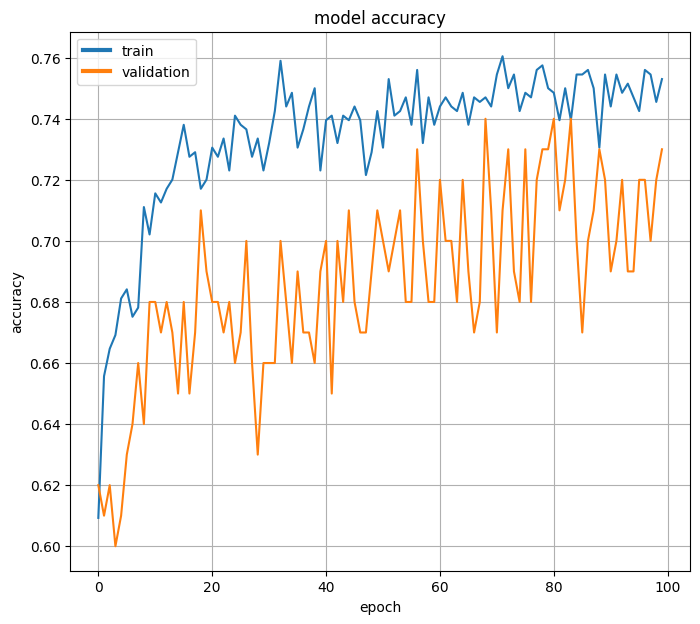

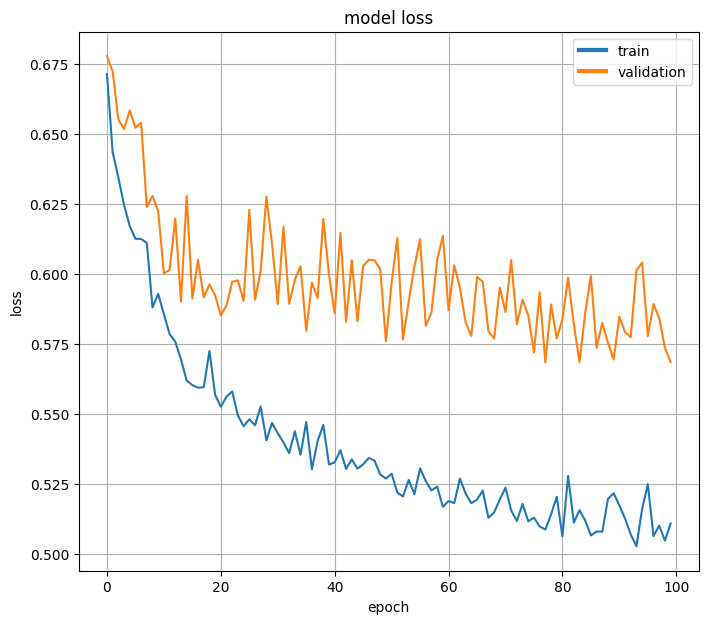

In [33]:
show_scores(model1, h, X_train, Y_train, X_test, Y_test)

In [34]:
# At any stage we can evaluate the accuracy and loss of our training set

loss, accuracy = model1.evaluate(X_train, Y_train, verbose=0)
print(f"Training: accuracy = {accuracy}, loss = {loss}")

Training: accuracy = 0.7589820623397827, loss = 0.49674662947654724


In [35]:
# It is more interesting to evaluate our validation data
# and see if its scores resembles those of our training data

loss, accuracy = model1.evaluate(X_test, Y_test, verbose=0)
print(f"Validation: accuracy={accuracy}, loss={loss}")

Validation: accuracy=0.7300000190734863, loss=0.568533182144165


The validation scores came out quite close to the training scores
(this gap is usually an indication of an **overfitting** phenomenon which we will
discuss more later on).
In order to appreciate this result, we should ask ourselves what is the probability for it
to happen?
Just by looking at the data there doesn't seem to be any correlation between the
validation set to the training set.
The model was built by looking at the trainig data alone, and has not seen any of the
test data at all.
Theoretically, it well may happen that diabetes is a chaotic illness,
and that there is no relation between the test data and the trainig data !?

Suppose we have $n$ records in our validation data X_test:
${x_1, x_2, x_3, \cdots, x_n}$.
The probabilty for guessing the diabetes check for each record is $0.5$,
and therefore the probability to guess more than 75% of the results is given
by the formula
$$
\textbf{probability} = \sum_{i=k}^{n} \binom{n}{i} \cdot p^{i} \cdot (1-p)^{n-i}
$$
where $p = 0.5$ and $k = \textbf{int}(0.75 n)$.
In our case, $n = 168$, $k = 117$, and $p = 0.5$.

A simple calculation yields:
$$
\textbf{probabilty} = 3.0047541e-11 = 0.000000000030047541
$$

This is a convincing indication that the Pima Indian Diabetes database is indeed governed
by some hidden laws which were partially captured by our neural-network (model1)
but are not visible to the naked eye, not even for an experienced physician eye
(I would even add and say that it would be foolish to trust a human to master the wisdom
behind this data).

The amazing fact is that it took Keras 5 seconds to build the model1 neural-network,
and it well maybe more trustable than some human trying to capture the database structure
by a manual study of it.

Code for computing this probability can be obtained from
<br/>
http://www.samyzaf.com/ML/lib/prob.py

## Trying model2 ...
As model1 has shown an encouraging start.
We will try now to add an additional deep layer with 8 neurons (just for curiosity testing)
and build a new model2, which hopefully will be more successful than model1.

We will also increase the number of epochs (**epochs**) to 160 and reduce **batch_size** to 8.
We will try to capture the best model (in training process) whose training accuracy is not below 0.8 (**minacc**) and its distance to the validation accuracy (**thresh**) is below 0.05.
If a model of this sort is found during the training process, it will be automatically saved
in the file **model_2_autosave.keras** (can happen several times).

In [36]:
# Our second Keras Model
model2 = Sequential()
model2.add(Dense(8, input_dim=8, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# compilation
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# training
fmon = FitMonitor(thresh=0.05, minacc=0.8, filename="model_2_autosave.keras")
h = model2.fit(X_train, Y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_test, Y_test),
    callbacks=[fmon],
    verbose=0,
)

Train begin: 2025-03-07 14:50:43
Stop file: stop_training_file.keras (create this file to stop training gracefully)
Pause file: pause_training_file.keras (create this file to pause training and view graphs)
epochs = 200
steps = 42
verbose = 0
.....05% epoch=10, accuracy=0.666168, loss=0.599633, val_accuracy=0.650000, val_loss=0.636241, time=8.1 seconds
.....10% epoch=20, accuracy=0.699102, loss=0.586509, val_accuracy=0.650000, val_loss=0.611336, time=10.2 seconds
.....15% epoch=30, accuracy=0.709581, loss=0.568816, val_accuracy=0.690000, val_loss=0.614952, time=12.2 seconds
.....20% epoch=40, accuracy=0.711078, loss=0.561912, val_accuracy=0.690000, val_loss=0.593397, time=14.4 seconds
.....25% epoch=50, accuracy=0.720060, loss=0.556185, val_accuracy=0.710000, val_loss=0.585685, time=16.9 seconds
.....30% epoch=60, accuracy=0.738024, loss=0.547180, val_accuracy=0.680000, val_loss=0.581418, time=19.4 seconds
.....35% epoch=70, accuracy=0.720060, loss=0.553252, val_accuracy=0.630000, val_

Training: accuracy   = 0.770958 loss = 0.486789
Validation: accuracy = 0.700000 loss = 0.539188
Over fitting score   = 0.061353
Under fitting score  = 0.055728
Params count: 233
stop epoch = 199
epochs = 200


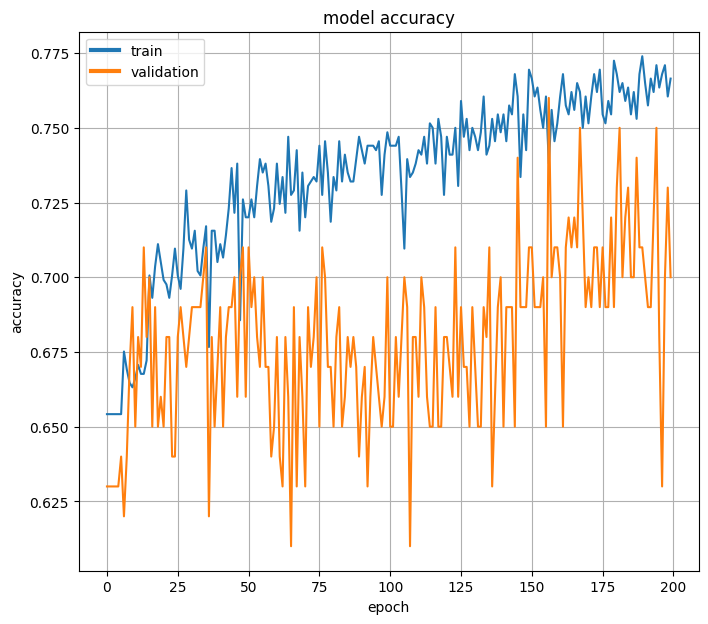

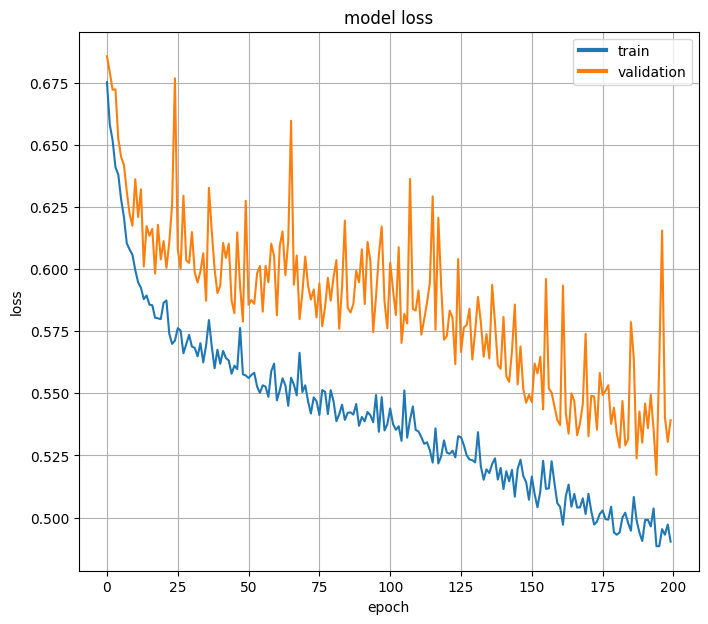

In [39]:
model2.save("model_2.keras")
show_scores(model2, h, X_train, Y_train, X_test, Y_test)

Adding one more hidden layer improved accuracy slightly.
The training and validation scores are even closer to each other which adds confidence
to our model.
However note that during the training process
the **FitMonitor** was able to
capture and save a model with a slightly better scores.

In [40]:
# We need to load the saved model which is better than the last one
model2 = load_model("model_2.keras")

In [41]:
# accuracy and loss of our training set

loss, accuracy = model2.evaluate(X_train, Y_train, verbose=0)
print("Train: accuracy=%f, loss=%f" % (accuracy, loss))

Train: accuracy=0.770958, loss=0.486789


In [42]:
# accuracy and loss of validation set

loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print("Test: accuracy=%f, loss=%f" % (accuracy, loss))

Test: accuracy=0.700000, loss=0.539188
